# Neural Networks - Pre Trained Image Classification

## Imports

In [52]:
import numpy as np
import tensorflow as tf
import keras

from keras.preprocessing.image import img_to_array, load_img
from IPython.core.display import display
from keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from tensorflow.keras.models import Sequential
from keras.applications.vgg19 import VGG19, preprocess_input as vgg19_prepocess_input
from keras.applications.vgg19 import decode_predictions as decode_vgg19

## Constants


In [3]:
FILE_1 = '01 Umbrella.jpg'
FILE_2 = '02 Couple.jpg'
FILE_3 = 'Ocean.jpg'

## Preposessing


In [67]:
def format_img(filename):
  pic = load_img(filename, target_size= (299, 299))
  display(pic)
  pic_array = img_to_array(pic)
  pic_array.shape
  expanded = np.expand_dims(pic_array, axis = 0)
  expanded.shape
  preprocessed = preprocess_input(expanded)
  return preprocessed

In [73]:
def format_img_vgg19(filename):
  pic = load_img(filename, target_size= (224,224))
  display(pic)
  pic_array = img_to_array(pic)
  pic_array.shape
  expanded = np.expand_dims(pic_array, axis = 0)
  expanded.shape
  preprocessed = vgg19_prepocess_input(expanded)
  return preprocessed

## Load InceptionResNet - Loading pretrained model from imagenet

In [11]:
inception_model = InceptionResNetV2(weights='imagenet')

225222656/225209952 [==============================] - 1s 0us/step


In [59]:
inception_model.graph = tf.compat.v1.get_default_graph()

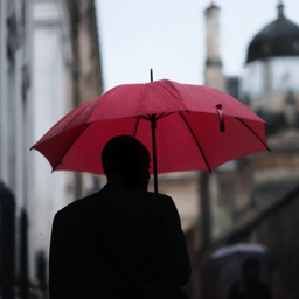

[[('n04507155', 'umbrella', 0.82924384),
  ('n03792972', 'mountain_tent', 0.0012268262),
  ('n04479046', 'trench_coat', 0.0011062954),
  ('n03788195', 'mosque', 0.0010572348),
  ('n03220513', 'dome', 0.0010310987)]]

In [70]:
data = format_img(FILE_1)
predictions = inception_model.predict(data)
decode_predictions(predictions)

## Testing the VGG19 Model

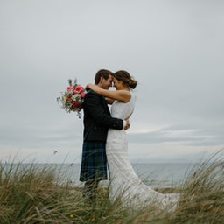

[[('n10148035', 'groom', 0.21170992),
  ('n02100735', 'English_setter', 0.044719275),
  ('n09399592', 'promontory', 0.036268897),
  ('n03450230', 'gown', 0.035969306),
  ('n02102040', 'English_springer', 0.03592263)]]

In [74]:
vgg_model = VGG19()
data_vgg = format_img_vgg19(FILE_2)
predictions_vgg = vgg_model.predict(data_vgg)
decode_vgg19(predictions_vgg)